# **PreProcessing collected Tweets & EDA**

In [2]:
#Data Manipulation
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
stop_words = stopwords.words("english")

#Machine learning libraries
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('primary_tweets.csv')
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,Tweet Id,Screen Name,User ID,Tweet Text
0,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...
1,1459183134524653575,MOTIVETED_WORLD,1434181035281903622,b'SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT ...
2,1459182824733376513,R_prajapati03,1855090232,"b""#kanganaranuat entire bollywood industry pu..."
3,1459182696807104517,haseebsiddique,131826354,b'#JustAsking\nNext should we expect #BharatRa...
4,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...


**Cleaning the text**

In [4]:
ls = WordNetLemmatizer()
tweets = []
total_words = []
for i in range(len(df)):
    sentence = df["Tweet Text"][i]
    sentence = sentence.lower()
    sentence = sentence.replace("\\n", "")
    sentence = re.sub(
        r'https://t.co/\w+|(x\w\w)|#\w+|&amp', ' ', sentence)

    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub('b\s', ' ', sentence)

    total_words.extend([word for word in sentence.split() if len(word) > 2])
    sentence = sentence.split()
    sentence = [ls.lemmatize(
        word) for word in sentence if word not in stop_words and len(word) > 2]
    # if word not in stop_words and len(word) > 2
    sentence = ' '.join(sentence)
    tweets.append(sentence)
total_words = ' '.join(total_words)


In [5]:
df['clean_tweets']=tweets

In [6]:
df['clean_tweets'].head()

0       insulted indian freedom fighter timesnow shame
1    special short tip self improvement genious wor...
2    entire bollywood industry put together equate ...
3                                            following
4       insulted indian freedom fighter timesnow shame
Name: clean_tweets, dtype: object

**Word Cloud for all Words in the collected Tweets**

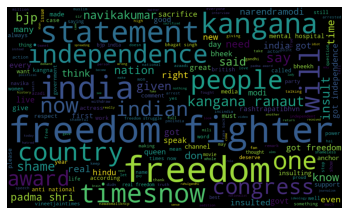

In [8]:
wc = WordCloud(width=1000, height=600).generate(total_words)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [9]:
df.head()

,Tweet Id,Screen Name,User ID,Tweet Text,clean_tweets
0,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame
1,1459183134524653575,MOTIVETED_WORLD,1434181035281903622,b'SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT ...,special short tip self improvement genious wor...
2,1459182824733376513,R_prajapati03,1855090232,"b""#kanganaranuat entire bollywood industry pu...",entire bollywood industry put together equate ...
3,1459182696807104517,haseebsiddique,131826354,b'#JustAsking\nNext should we expect #BharatRa...,following
4,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame


**Adding Polarity to the Text**

In [10]:
polar_values = []
for tweet in tweets:
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    # for senti, sc in score.items():
    neg=score['neg']
    pos=score['pos']
    if neg>pos:
        polar_values.append(float(score['neg']*-1))
    elif pos>neg:
        polar_values.append(float(score['pos']))
    else:
        polar_values.append(0)
        



In [11]:
df['Sentiment']=polar_values

In [12]:
df.head()

,Tweet Id,Screen Name,User ID,Tweet Text,clean_tweets,Sentiment
0,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame,-0.451
1,1459183134524653575,MOTIVETED_WORLD,1434181035281903622,b'SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT ...,special short tip self improvement genious wor...,0.487
2,1459182824733376513,R_prajapati03,1855090232,"b""#kanganaranuat entire bollywood industry pu...",entire bollywood industry put together equate ...,0.151
3,1459182696807104517,haseebsiddique,131826354,b'#JustAsking\nNext should we expect #BharatRa...,following,0.000
4,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame,-0.451


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet Id      831 non-null    int64  
 1   Screen Name   831 non-null    object 
 2   User ID       831 non-null    int64  
 3   Tweet Text    831 non-null    object 
 4   clean_tweets  831 non-null    object 
 5   Sentiment     831 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 39.1+ KB


**Splitting Positive and Negative Tweets**

In [14]:
positive_tweets=[]
negative_tweets=[]
neutral_tweets=[]
for i in range(len(df)):
    if df['Sentiment'][i]>0:
        positive_tweets.append(df['clean_tweets'][i])
    elif df['Sentiment'][i]<0:
        negative_tweets.append(df['clean_tweets'][i])
    else:
        neutral_tweets.append(df['clean_tweets'][i])

**Positive Tweets Wordcloud**

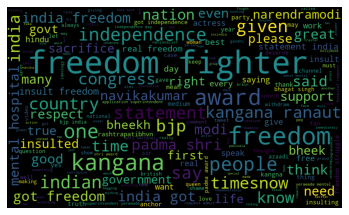

In [15]:
pos_word_cloud_text = []
for sentence in positive_tweets:
    sentence = [word for word in sentence.split()]
    pos_word_cloud_text.extend(sentence)
pos_word_cloud_text = ' '.join(pos_word_cloud_text)

wc = WordCloud(width=1000, height=600).generate(pos_word_cloud_text)
plt.imshow(wc)
plt.axis('off')
plt.show()


**Negative Tweets WordCLoud**

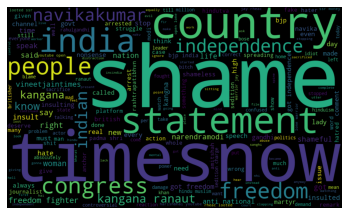

In [16]:
neg_word_cloud_text = []
for sentence in negative_tweets:
    sentence = [word for word in sentence.split()]
    neg_word_cloud_text.extend(sentence)
neg_word_cloud_text = ' '.join(neg_word_cloud_text)

wc = WordCloud(width=1000, height=600).generate(neg_word_cloud_text)
plt.imshow(wc)
plt.axis('off')
plt.show()


# Word2Vec using Gensim

In [17]:
import gensim
clean = df['clean_tweets'].apply(gensim.utils.simple_preprocess)
clean


0      [insulted, indian, freedom, fighter, timesnow,...
1      [special, short, tip, self, improvement, genio...
2      [entire, bollywood, industry, put, together, e...
3                                            [following]
4      [insulted, indian, freedom, fighter, timesnow,...
                             ...                        
826    [sakshijoshii, taapsee, shi, yar, kangna, nai,...
827    [recent, interview, taapsee, revealed, male, a...
828    [kangana, ranaut, starrer, form, franchise, se...
829    [find, agent, infront, hanshraj, campus, also,...
830    [shameless, pvr, inox, akshay, fan, release, t...
Name: clean_tweets, Length: 831, dtype: object

In [18]:
model = gensim.models.Word2Vec(
    window=7,
    min_count=3,
    workers=10
)
model.build_vocab(clean, progress_per=10000)
model.epochs = 500
model.train(clean, total_examples=model.corpus_count, epochs=model.epochs)


(2686425, 4646000)

In [19]:
model.wv.most_similar('freedom')

[('independence', 0.4138939380645752),
 ('condemn', 0.38941729068756104),
 ('britisher', 0.31890028715133667),
 ('many', 0.3166419565677643),
 ('sacrifice', 0.30120229721069336),
 ('gave', 0.29401904344558716),
 ('killed', 0.2912003695964813),
 ('strongly', 0.2850797772407532),
 ('according', 0.28474393486976624),
 ('mili', 0.2838590741157532)]

# Finding the Screen Names and Twitter Id's of the negative tweets

In [20]:
profiles={}
for i in range(len(df)):
    if df['Sentiment'][i]< -0.45:
        profiles[df['User ID'][i]] = [df['Screen Name']
                                      [i], df['Tweet Text'][i], df['Sentiment'][i]]


In [21]:
len(profiles)

48

In [22]:
for l in profiles.values():
    k=re.sub(r'x\w\w|\\n|\\|https://t.co/\w+|#\w+','',l[1])
    k = k.replace("b'", '').replace("'", '').replace('b"','').replace("\n", '').strip()
    print(f'{l[0]}: {k}')


WarNishant: Insulted Indian Freedom Fighters- @TimesNow Shame on
Krishna72210311: @TimesNow @salman7khurshid     Stop spreading hate TIMESNOW people shame on you and your dalal journalism
Harjind41159428: Shame on you
vaswani_dhaval: Boycott her .....she is totally mad....
emperorishere: @narendramodi sir ..when did we got independence??? in 1947 or in 2014   we are confused...if latter is wrong then why dont you react??? "
hemantvakharia: This man called @RahulGandhi should b prosecuted/jailed by fast track court 4 spreading communal disharmony by spreading false messages out of sheer hunger 4 power &amp; money.  His idiot slaves are talking about arresting  instead. These bastards have destroyed India.
IshaannSharma: With each s statement I loose a braincell"
ApurvN05: Just finished watching  and Im still traumatised by the jalianwala bagh scene. I think  should be jailed for making such shameful remarks.
M_Sharma2017: Kangana, navika should be arrested
Pandeylogic: @gauravcsawant &a

**Arranging the Data rating from most negative to least negative and displaying Usernames & Text**

In [23]:
users=[user[0] for user in profiles.values()]
tweets=[]
sentences=[tweet[1] for tweet in profiles.values()]
for tweet in sentences:
    tweet = re.sub(r'x\w\w|\\n|\\|https://t.co/\w+|#\w+', '', tweet)
    tweet = tweet.replace("b'", '').replace('b"','').replace("'", '').replace("\n", '').strip()
    tweets.append(tweet)
sentiments=[sentiment[2] for sentiment in profiles.values()]
user_dataset=pd.DataFrame(users,columns=['Username'])
user_dataset['Sentiments']=sentiments
user_dataset['Tweet']=tweets
user_dataset=user_dataset.sort_values(by=['Sentiments'],ascending=True)
user_dataset


,Username,Sentiments,Tweet
43,VikrantYenare,-1.000,Shame on you
17,kaustubhp07,-1.000,Shame on you
42,Annie2tweets,-1.000,Account suspended
22,SamplaSimar,-1.000,Shame on
29,CognizantGyan,-1.000,Shame on !!Shame on !!Shame on !!
27,AnandAshaChoud1,-1.000,Shame on you
2,Harjind41159428,-1.000,Shame on you
45,harsha092,-0.865,This idiot is shame for the nation...
3,vaswani_dhaval,-0.853,Boycott her .....she is totally mad....
39,CRebreak,-0.811,XD I am dead after this one


**Saving Users Tweets for Detecting profiles who are posting abusive content**

In [24]:
user_dataset.to_csv('User_Tweets.csv')

In [25]:
df

,Tweet Id,Screen Name,User ID,Tweet Text,clean_tweets,Sentiment
0,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame,-0.451
1,1459183134524653575,MOTIVETED_WORLD,1434181035281903622,b'SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT ...,special short tip self improvement genious wor...,0.487
2,1459182824733376513,R_prajapati03,1855090232,"b""#kanganaranuat entire bollywood industry pu...",entire bollywood industry put together equate ...,0.151
3,1459182696807104517,haseebsiddique,131826354,b'#JustAsking\nNext should we expect #BharatRa...,following,0.000
4,1459183309058052104,WarNishant,1435278663679823882,b'#KanganaRanaut Insulted Indian Freedom Fight...,insulted indian freedom fighter timesnow shame,-0.451
...,...,...,...,...,...,...
826,1456550587030380548,MotiKum,968302345946886144,b'@sakshijoshii @taapsee Shi m yar ye .. 2rs k...,sakshijoshii taapsee shi yar kangna nai badleg...,0.000
827,1456512297308803078,PinkvillaRooms,1357881473441755139,"b""In a recent interview Taapsee revealed how s...",recent interview taapsee revealed male actor w...,0.000
828,1456498787354963969,MovieTalkies,63682454,b'Kangana Ranaut Starrer #Dhaakad To Form A Fr...,kangana ranaut starrer form franchise series f...,0.000
829,1456283047708409856,ElvinBaruah,111241131,b'I find your agent infront of Hanshraj &amp; ...,find agent infront hanshraj campus also innoce...,0.238


**Negative and positive Tweets for LSTM & SVM**

In [28]:
complete_tweets=[]
sentences = []
polarity_values=[]
for i in range(len(df)):
    if df['Sentiment'][i]<0:
        sentences.append(df['Tweet Text'][i])
        polarity_values.append(0)
    elif df['Sentiment'][i] > 0:
        sentences.append(df['Tweet Text'][i])
        polarity_values.append(1)
for tweet in sentences:
    tweet = re.sub(r'x\w\w|\\n|\\|https://t.co/\w+|#\w+|@\w+', '', tweet)
    tweet = tweet.replace("b'", '').replace(
        'b"', '').replace("'", '').replace("\n", '').strip()
    complete_tweets.append(tweet)
whole_tweets=pd.DataFrame(complete_tweets,columns=['Tweets'])
whole_tweets['Sentiment']=polarity_values
whole_tweets


,Tweets,Sentiment
0,Insulted Indian Freedom Fighters- Shame on,0
1,SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT :-...,1
2,entire bollywood industry put together cant eq...,1
3,Insulted Indian Freedom Fighters- Shame on,0
4,SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT :-...,1
...,...,...
679,What a prediction by Finally arrested.,0
680,Just watched fantastic film great performance...,1
681,", the onky best.",1
682,I find your agent infront of Hanshraj &amp; DU...,1


In [27]:
whole_tweets.to_csv('whole_tweets.csv')